In [1]:
# Libraries
import tweepy
import json
import pandas as pd
from pandas.io.json import json_normalize 
import datetime

In [2]:
# Keys


In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
data = api.me()

In [6]:
# function to convert _json to JSON
def jsonify_tweepy(tweepy_object):
    json_str = json.dumps(tweepy_object._json)
    return json.loads(json_str)

# function to get extended retweets
def jsonify_tweepy_2(tweet_info):

    if "retweeted_status" in dir(tweet_info):
      return tweet_info.retweeted_status.full_text
    else:
      return tweet_info.full_text

# df.iloc[row][col]

Accounts or keywords
Keywords
* "car innovation ideas"
* ""
* "mustang mach e"
* "ford vehicle issues"
* "ford car issues"
* "truck issues"

Pages

In [7]:
startDate = datetime.datetime(2021, 7, 4, 0, 0, 0)
endDate =   datetime.datetime(2022, 7, 4, 0, 0, 0)

In [8]:
# searching by keywords
keyword_res = list(tweepy.Cursor(api.search, q="mustang mach e", tweet_mode="extended").items(3000))

In [9]:
#truck_issues = json_normalize([jsonify_tweepy(tweet) for tweet in truck_issues_req])
keyword_df = json_normalize([jsonify_tweepy(tweet) for tweet in keyword_res])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [10]:
keyword_df.full_text = pd.DataFrame([jsonify_tweepy_2(tweet) for tweet in keyword_res ])

In [11]:
keyword_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,quoted_status.user.entities.url.urls
0,Mon Apr 11 00:30:35 +0000 2022,1513313526324113420,1513313526324113420,@Jaswht Tesla? Mustang mach e?,False,"[8, 30]","<a href=""http://twitter.com/download/android"" ...",1.513313e+18,1513313243430678530,344434288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Apr 11 00:09:32 +0000 2022,1513308228691578885,1513308228691578885,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,False,"[0, 100]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Apr 10 23:33:35 +0000 2022,1513299182869745670,1513299182869745670,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,False,"[0, 100]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Apr 10 23:32:22 +0000 2022,1513298874550657027,1513298874550657027,Ford Mustang Mach E 1400 🔥\n#ForzaHorizon5 @Fo...,False,"[0, 55]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Apr 10 20:03:15 +0000 2022,1513246248517570561,1513246248517570561,https://t.co/F80hQJ46M8,False,"[0, 23]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#print(keyword_df.columns[150:200])

In [12]:
len(keyword_df)

338

In [14]:
keyword_df.to_excel("mustang_mach_e041022.xlsx")

## Executing sentiment analisis

In [17]:
!pip install langdetect 

     |████████████████████████████████| 981 kB 4.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=3475aa6c3aec1caa88c95865e9efb472b903b864654432e64b8abeb269e8c017
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [18]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import numpy as np
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [19]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# New dataframe columns
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [21]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [23]:
#keyword_df = pd.read_csv("potholes_df1.csv")
tweets = keyword_df.full_text

In [24]:
noOfTweet = len(keyword_df)

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [25]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  338
positive number:  151
negative number:  52
neutral number:  135


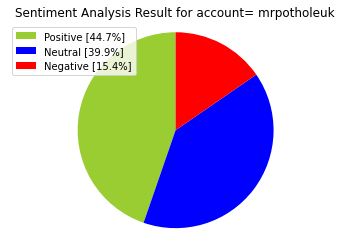

In [26]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for account= mrpotholeuk" )
plt.axis('equal')
plt.show()